# Visualization of Covid19
### by Karan Sharma - Feb 2021

Machine learning has numerous tools that can be used for visualization and prediction, and nowadays it is used worldwide for study of the pattern of COVID-19 spread. One of the main focus of the study in this project is to use machine learning techniques to analyze and visualize the spreading of the virus country-wise as well as globally during a specific period of time by considering confirmed cases, recovered cases and fatalities. This Notebook Covers the Visualization of Covid19 Data. There will gonna an other Notebook as well for Prediction Part of this Project. 

**Data Sources** : __[COVID-19 datasets from Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)__

**More information** :  __[World Health Organisation(WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)__

# Set up

In [2]:
# for dataset handling and calculations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline

# for advanced visualizations
import seaborn as sns

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime, timedelta

# for file and folder operations
import os

np.random.seed(42)

# Read datasets

In [3]:
# read files from url
download_root = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_df = pd.read_csv(download_root + "time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv(download_root + "time_series_covid19_recovered_global.csv")
deaths_df = pd.read_csv(download_root + "time_series_covid19_deaths_global.csv")

# save datasets as '*.csv' file
confirmed_df.to_csv('confirmed_df.csv', index = False)
recovered_df.to_csv('recovered_df.csv', index = False)
deaths_df.to_csv('deaths_df.csv', index = False)

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,110,110,110,110,112,112,112,112,112,112
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,506,508,508,510,510,511,511,512,514,515


In [6]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49288,49333,49344,49347,49359,49362,49362,49369,49378,49402
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,68969,69773,70413,71173,72076,72853,73610,74352,75190,75887
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,77976,78098,78234,78377,78524,78672,78824,78946,79064,79187
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10429,10446,10475,10501,10560,10564,10584,10599,10626,10661
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19315,19322,19400,19410,19509,19553,19624,19640,19647,19657


# Make a full dataframe by merging all of three

In [7]:
# melt dataframes to go from wide to long
def melt_df(df, name):
    melted = pd.melt(df, id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                    value_vars = confirmed_df.columns[4:],
                    var_name = 'Date', value_name = name)
    return melted

melt_confirmed = melt_df(confirmed_df, 'Confirmed')
melt_recovered = melt_df(recovered_df, 'Recovered')
melt_deaths = melt_df(deaths_df, 'Deaths')

print(melt_confirmed.head())

# merge dataframes
def merge(df1, df2):
    merged = pd.merge(left = df1, right = df2, how = 'left',
                     on = ['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
    return merged

main_df = merge(merge(melt_confirmed, melt_deaths), melt_recovered)
print(main_df.shape)
main_df.head()

  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0
(112888, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [8]:
main_df.to_csv('covid19_full_uncleaned.csv', index = False)

# Preparation of the dataset

In [9]:
# Percentage of the missing data in each column

number_of_rows = main_df.shape[0]
percentage_of_missing_data = main_df.isnull().sum() / number_of_rows
percentage_of_missing_data

Province/State    0.689781
Country/Region    0.000000
Lat               0.003650
Long              0.003650
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
Recovered         0.076642
dtype: float64

In [10]:
# fill missing values of 'Recovered' with 0
main_df['Recovered'] = main_df['Recovered'].fillna(0)

# fill missing values of 'Province/State' with ''
main_df['Province/State'] = main_df['Province/State'].fillna('')

# fill missing values of 'Lat' with median 
median = main_df['Lat'].median()
main_df['Lat'] = main_df['Lat'].fillna(median)

# fill missing values of 'Long' with median 
median = main_df['Long'].median()
main_df['Long'] = main_df['Long'].fillna(median)

# Change the values of 'Recovered' to int datatype
main_df['Recovered'] = main_df['Recovered'].astype('int')

# change names of some countries
main_df['Country/Region'] = main_df['Country/Region'].replace('Korea, South', 'South Korea')
main_df['Country/Region'] = main_df['Country/Region'].replace('Mainland China', 'China')
main_df['Country/Region'] = main_df['Country/Region'].replace('Taiwan*', 'Taiwan')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Kinshasa)', 'Democratic Republic of the Congo')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Brazzaville)', 'Republic of the Congo')
main_df.loc[main_df['Province/State'] == 'Greenland', 'Country/Region'] = 'Greenland'

# define new feature for main df
main_df['Active'] = main_df['Confirmed'] - main_df['Deaths'] - main_df['Recovered']

main_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
112883,,Vietnam,14.058324,108.277199,3/8/21,2524,35,1920,569
112884,,West Bank and Gaza,31.952200,35.233200,3/8/21,198554,2157,176507,19890
112885,,Yemen,15.552727,48.516388,3/8/21,2545,653,1447,445
112886,,Zambia,-13.133897,27.849332,3/8/21,82655,1132,78721,2802
112887,,Zimbabwe,-19.015438,29.154857,3/8/21,36289,1487,33872,930


In [11]:
main_df['Date'].describe()

count      112888
unique        412
top       1/24/20
freq          274
Name: Date, dtype: object

In [12]:
# convert dates to proper date format for better visualization
# dt.normalize() is just to change display from 2020-04-09 00:00:00 to 2020-04-09

main_df['Date'] = pd.to_datetime(main_df['Date']).dt.normalize()
main_df['Date'].describe()

count                  112888
unique                    412
top       2020-10-28 00:00:00
freq                      274
first     2020-01-22 00:00:00
last      2021-03-08 00:00:00
Name: Date, dtype: object

In [13]:
main_df['Date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
112883   2021-03-08
112884   2021-03-08
112885   2021-03-08
112886   2021-03-08
112887   2021-03-08
Name: Date, Length: 112888, dtype: datetime64[ns]

In [14]:
main_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0


### Save main_df to csv

In [15]:
main_df.to_csv('Covid19_full_cleaned.csv', index = False)

In [16]:
covid19_date_country = main_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()\
                                    .reset_index()

# add new columns containing new confirmed, new deaths, new recovered for each day
new_col = main_df.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()\
                                    .diff().reset_index()

# rename some Columns of new_col
new_col.columns = ['Country/Region', 'Date', 'New Confirmed', 'New deaths', 'New recovered']
columns = ['New Confirmed', 'New deaths', 'New recovered']

# fix the value of first row for each country
first_rows = (new_col['Country/Region'] != new_col['Country/Region'].shift(1))
new_col.loc[first_rows, 'New Confirmed'] = 0
new_col.loc[first_rows, 'New deaths'] = 0
new_col.loc[first_rows, 'New recovered'] = 0
new_col

,Country/Region,Date,New Confirmed,New deaths,New recovered
0,Afghanistan,2020-01-22,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0
...,...,...,...,...,...
79511,Zimbabwe,2021-03-04,44.0,5.0,240.0
79512,Zimbabwe,2021-03-05,25.0,1.0,127.0
79513,Zimbabwe,2021-03-06,12.0,1.0,46.0
79514,Zimbabwe,2021-03-07,11.0,0.0,29.0


In [17]:
covid19_date_country.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [18]:
# merging new values
covid19_date_country = pd.merge(covid19_date_country, new_col, on=['Country/Region', 'Date'])

In [19]:
covid19_date_country

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0,0,0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0,0,0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0,0,0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
79511,2021-03-08,Vietnam,2524,35,1920,569,12.0,0.0,0.0
79512,2021-03-08,West Bank and Gaza,198554,2157,176507,19890,1742.0,17.0,1329.0
79513,2021-03-08,Yemen,2545,653,1447,445,72.0,2.0,1.0
79514,2021-03-08,Zambia,82655,1132,78721,2802,234.0,8.0,778.0


In [20]:
# fill missing values with 0
covid19_date_country = covid19_date_country.fillna(0)

covid19_date_country['New Confirmed'] = covid19_date_country['New Confirmed'].apply(lambda x: 0 if x < 0 else x)

# fix data types of new columns
covid19_date_country[columns] = covid19_date_country[columns].astype('int')

In [21]:
covid19_date_country.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered
79511,2021-03-08,Vietnam,2524,35,1920,569,12,0,0
79512,2021-03-08,West Bank and Gaza,198554,2157,176507,19890,1742,17,1329
79513,2021-03-08,Yemen,2545,653,1447,445,72,2,1
79514,2021-03-08,Zambia,82655,1132,78721,2802,234,8,778
79515,2021-03-08,Zimbabwe,36289,1487,33872,930,18,2,38


In [22]:
# save as .csv file
covid19_date_country.to_csv('covid19_date_country.csv', index = False)

# save India_df.csv file
India_df = covid19_date_country[covid19_date_country['Country/Region'] == 'India']
India_df.to_csv('covid19_india.csv', index = False)

### Dataframe with the latest values of 'Country/Region'

In [23]:
# get the latest values related to each country
covid19_country_latest = covid19_date_country[covid19_date_country['Date'] == max(covid19_date_country['Date'])]\
                                                        .reset_index(drop = True).drop('Date', axis = 1)
print(covid19_country_latest.shape)
print(covid19_country_latest['Country/Region'].unique().shape)

# drop WHO Column
# covid19_country_latest = covid19_country_latest.drop('WHO region', axis = 1)

# mortality and recovery rate
covid19_country_latest['Recovery rate(per 100)'] = \
                            np.round(100 * covid19_country_latest['Recovered'] / covid19_country_latest['Confirmed'], 2)
covid19_country_latest['Mortality rate(per 100)'] = \
                            np.round(100 * covid19_country_latest['Deaths'] / covid19_country_latest['Confirmed'], 2)
 
# find missisng values if any
covid19_country_latest.isnull().sum()

(193, 8)
(193,)


Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New Confirmed              0
New deaths                 0
New recovered              0
Recovery rate(per 100)     0
Mortality rate(per 100)    0
dtype: int64

In [24]:
# save as .csv file
covid19_country_latest.to_csv('covid19_country_latest.csv', index = False)

### Group Covid19_day_country DataFrame by 'Date'

In [25]:
covid19_world = covid19_date_country.groupby('Date')['Confirmed', 'Deaths', 'Recovered','Active', 'New Confirmed', 
                                                      'New deaths', 'New recovered'].sum().reset_index()

# Mortality and Recovery Rates
covid19_world['Recovery rate(per 100)'] = \
                np.round(100*covid19_world['Recovered']/covid19_world['Confirmed'],2)
covid19_world['Mortality rate(per 100)'] = \
                np.round(100*covid19_world['Deaths']/covid19_world['Confirmed'],2)

# No of Countries Having Non-zero Confirmed cases on each date
covid19_world['Number of countries'] = covid19_date_country[covid19_date_country['Confirmed']!=0].groupby('Date')\
                                       ['Country/Region'].unique().apply(len).values

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_world[columns] = covid19_world[columns].fillna(0)

covid19_world.head()

,Date,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
0,2020-01-22,557,17,30,510,0,0,0,5.39,3.05,6
1,2020-01-23,655,18,32,605,98,1,2,4.89,2.75,8
2,2020-01-24,941,26,39,876,286,8,7,4.14,2.76,9
3,2020-01-25,1433,42,42,1349,492,16,3,2.93,2.93,11
4,2020-01-26,2118,56,56,2006,685,14,14,2.64,2.64,13


In [26]:
# save as '*.csv' file
covid19_world.to_csv('covid19_world.csv', index=False)

## Visualizations

### the latest global status

In [27]:
sns.set_theme()

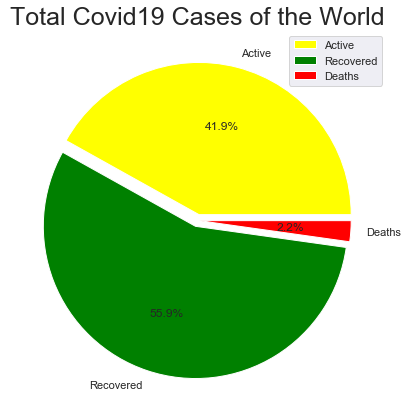

In [28]:
labels = ['Active', 'Recovered', 'Deaths']
data = covid19_world[labels].tail(1)
data[labels]
colors = ['yellow', 'green', 'Red']
explode = (0.04, 0.04, 0.01)
plt.figure(figsize  = (7, 7))
patches = plt.pie(data, colors=colors,labels = labels, explode= explode ,autopct='%1.1f%%', shadow=False, startangle=0)
ax = plt.title('Total Covid19 Cases of the World', fontsize = 25)
plt.legend()

## Current Scenario of the Covid19 in the World

In [29]:
covid19_world.tail(1)

,Date,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
411,2021-03-08,117148248,2600063,65455283,49092902,303777,6839,270227,-17.45,2.22,193


In [30]:
top10_most_affected_country = covid19_country_latest.sort_values(by = 'Confirmed', ascending = False).head(10)
top10_most_affected_country

,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100)
179,US,29044110,525752,0,28518358,50237,719,0,0.00,1.81
79,India,11244786,157930,10899394,187462,15388,77,16596,96.93,1.40
23,Brazil,11051665,266398,9826292,958975,32321,987,86828,88.91,2.41
142,Russia,4284408,87985,3878189,318234,10145,371,10288,90.52,2.05
183,United Kingdom,4235989,124801,11853,4099335,4823,65,2,0.28,2.95
61,France,3969612,89090,272887,3607635,5534,363,808,6.87,2.24
163,Spain,3160970,71436,150376,2939158,11958,298,0,4.76,2.26
85,Italy,3081368,100103,2508732,472533,13882,318,13893,81.42,3.25
178,Turkey,2793632,29094,2632030,132508,13215,64,8106,94.22,1.04
65,Germany,2513784,72236,2322734,118814,5129,252,8334,92.40,2.87


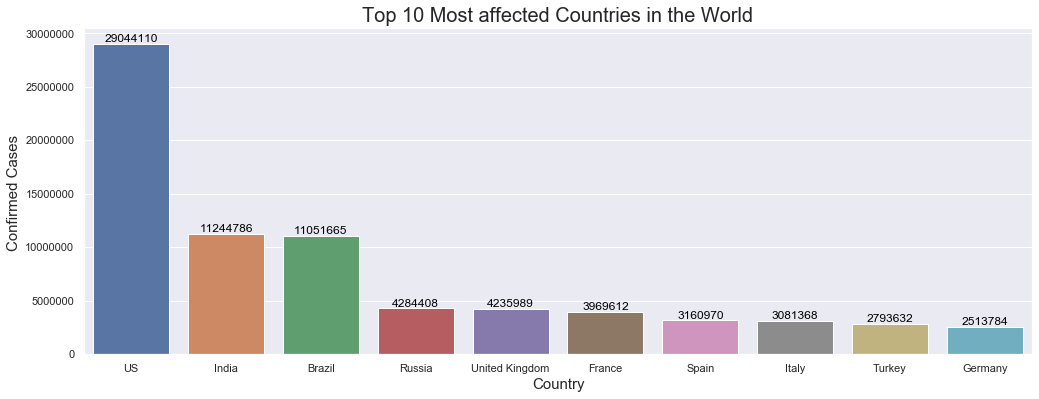

In [31]:
plt.figure(figsize = (17, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x = 'Country/Region', y = 'Confirmed', data = top10_most_affected_country)
g.set_title('Top 10 Most affected Countries in the World', fontsize = 20)
g.set_xlabel('Country', fontsize =15)
g.set_ylabel('Confirmed Cases ', fontsize = 15)

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')


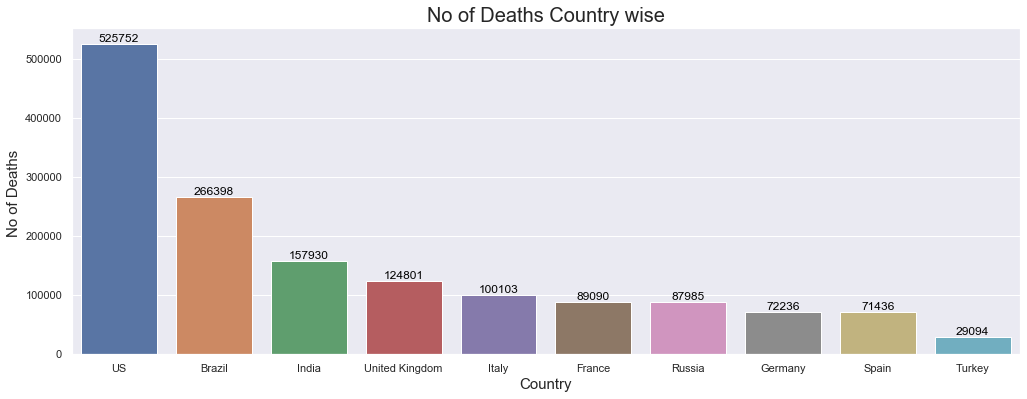

In [32]:
plt.figure(figsize = (17, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x = 'Country/Region', y = 'Deaths', data = top10_most_affected_country.sort_values(by = 'Deaths')[::-1])
g.set_title('No of Deaths Country wise', fontsize = 20)
g.set_xlabel('Country', fontsize =15)
g.set_ylabel('No of Deaths ', fontsize = 15)

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')


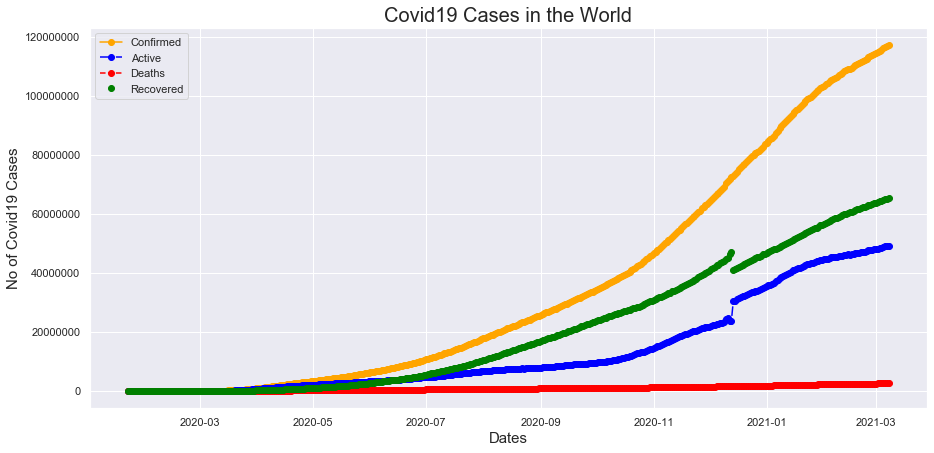

In [33]:
f = plt.figure(figsize = (15, 7))
ax = f.subplots(1, 1)

plt.ticklabel_format(style = 'plain', axis = 'y')
ax.set_title('Covid19 Cases in the World', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Covid19 Cases', fontsize = 15)

ax.plot_date(covid19_world['Date'], covid19_world["Confirmed"], color="orange", label="Confirmed", linestyle="-")
ax.plot_date(covid19_world['Date'], covid19_world["Active"], color="blue", label="Active", linestyle="-.")
ax.plot_date(covid19_world['Date'], covid19_world["Deaths"], color="red", label="Deaths", linestyle="--")
ax.plot_date(covid19_world['Date'], covid19_world["Recovered"], color="green", label="Recovered", linestyle="")
ax.legend()

In [34]:
#Current Scenario of Covid 19 Cases all over the World
covid19_world.tail(1)

,Date,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
411,2021-03-08,117148248,2600063,65455283,49092902,303777,6839,270227,-17.45,2.22,193


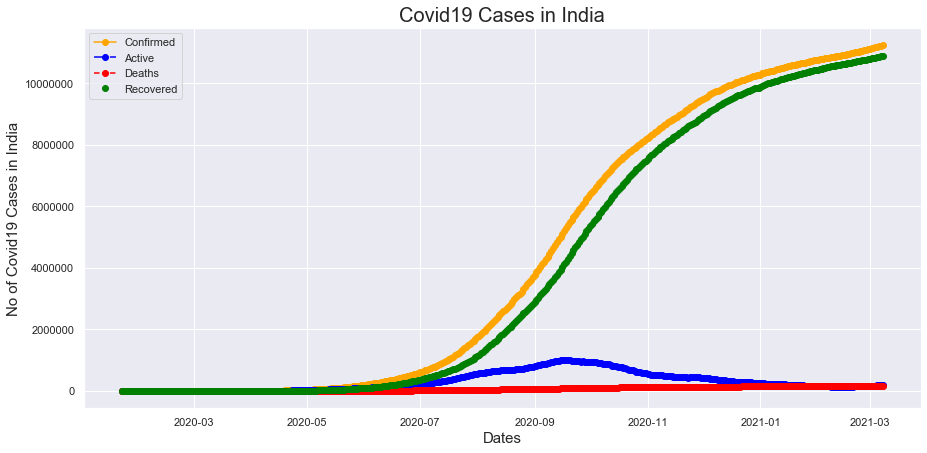

In [35]:
f = plt.figure(figsize = (15, 7))
ax = f.subplots(1, 1)

plt.ticklabel_format(style = 'plain', axis = 'y')
ax.set_title('Covid19 Cases in India', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Covid19 Cases in India', fontsize = 15)

ax.plot_date(India_df['Date'], India_df["Confirmed"], color="orange", label="Confirmed", linestyle="-")
ax.plot_date(India_df['Date'], India_df["Active"], color="blue", label="Active", linestyle="-.")
ax.plot_date(India_df['Date'], India_df["Deaths"], color="red", label="Deaths", linestyle="--")
ax.plot_date(India_df['Date'], India_df["Recovered"], color="green", label="Recovered", linestyle="")
ax.legend()

## Current Scenario of Covid19 in India

In [36]:
India_df.tail(1)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered
79402,2021-03-08,India,11244786,157930,10899394,187462,15388,77,16596


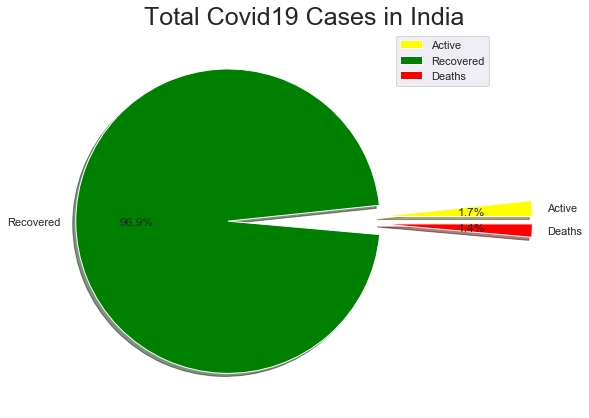

In [37]:
labels = ['Active', 'Recovered', 'Deaths']
data = India_df[labels].tail(1)
data[labels]
colors = ['yellow', 'green', 'Red']
explode = (0.5, 0.5, 0.5)
plt.figure(figsize  = (7, 7))
patches = plt.pie(data, colors=colors,labels = labels, explode= explode ,autopct='%1.1f%%', shadow=True, startangle=0)
ax = plt.title('Total Covid19 Cases in India', fontsize = 25)
plt.legend()

In [38]:
# filtering dataframe for top 10 Countries

countries = top10_most_affected_country['Country/Region'].reset_index(drop = True)
countries = np.array(countries)
top = covid19_date_country.sort_values(by = 'Confirmed', ascending = False)
top10 = top[top['Country/Region'].apply(lambda x : True if x  in countries else False)]
top10.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered
79502,2021-03-08,US,29044110,525752,0,28518358,50237,719,0
79309,2021-03-07,US,28993873,525033,0,28468840,40903,671,0
79116,2021-03-06,US,28952970,524362,0,28428608,58062,1485,0
78923,2021-03-05,US,28894908,522877,0,28372031,66165,1758,0
78730,2021-03-04,US,28828743,521119,0,28307624,67763,1914,0


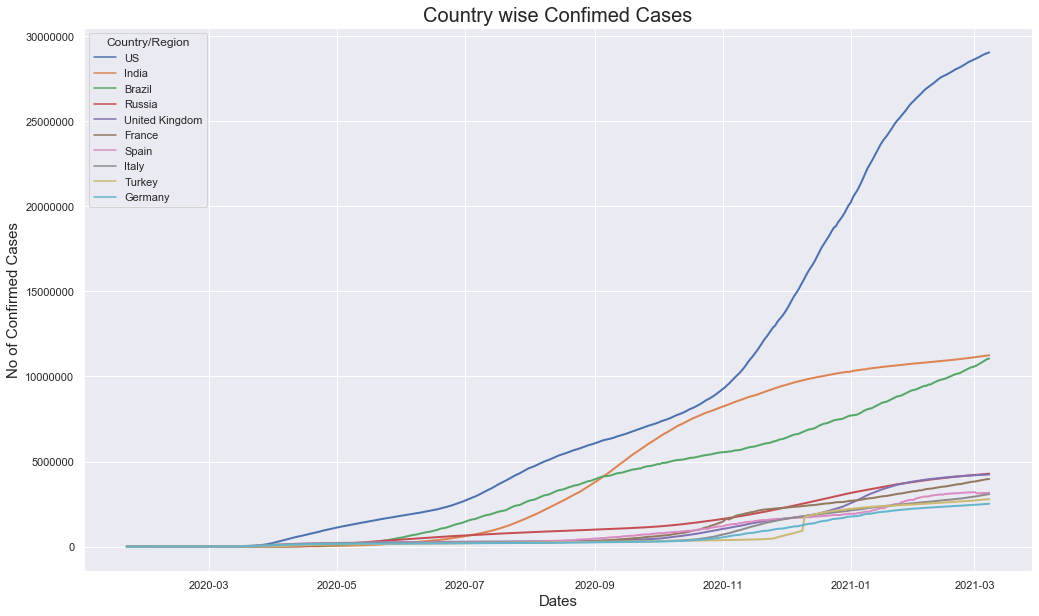

In [39]:
f = plt.figure(figsize = (17, 10))
ax = f.subplots(1, 1)
ax.set_title('Country wise Confimed Cases', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Confirmed Cases', fontsize = 15)

plt.ticklabel_format(style = 'plain', axis = 'y')
sns.lineplot(x = 'Date', y = 'Confirmed', data = top10, hue = 'Country/Region', lw = 2)

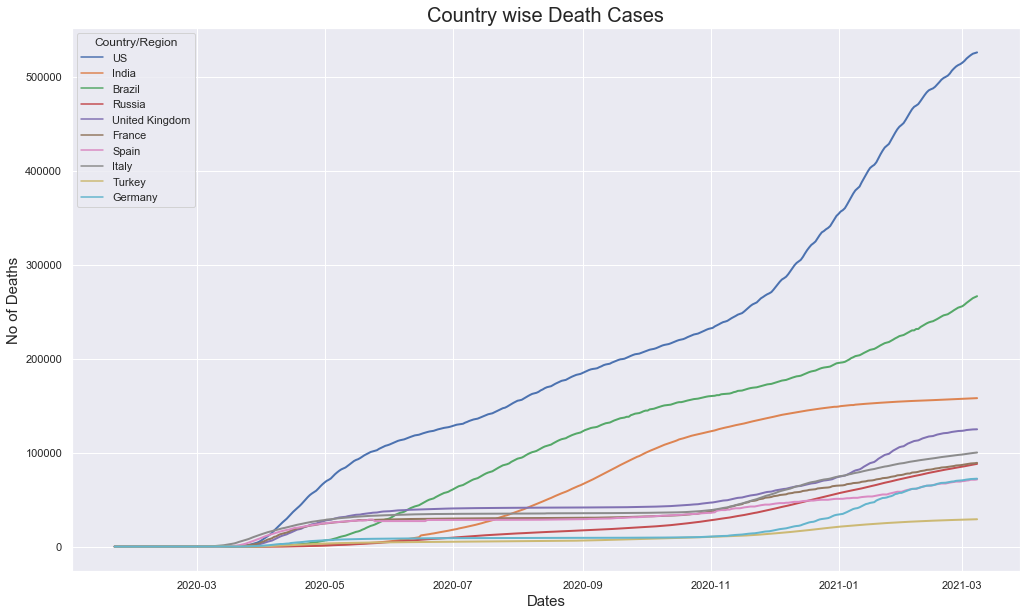

In [40]:
f = plt.figure(figsize = (17, 10))
ax = f.subplots(1, 1)
ax.set_title('Country wise Death Cases', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Deaths', fontsize = 15)

plt.ticklabel_format(style = 'plain', axis = 'y')
sns.lineplot(x = 'Date', y = 'Deaths', data = top10, hue = 'Country/Region', lw = 2)

# Top 10 Countries info

In [41]:
top10_most_affected_country.drop(['Recovered'], axis = 1, inplace = True)
top10_most_affected_country.reset_index(drop = True, inplace = True)
top10_most_affected_country

,Country/Region,Confirmed,Deaths,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100)
0,US,29044110,525752,28518358,50237,719,0,0.00,1.81
1,India,11244786,157930,187462,15388,77,16596,96.93,1.40
2,Brazil,11051665,266398,958975,32321,987,86828,88.91,2.41
3,Russia,4284408,87985,318234,10145,371,10288,90.52,2.05
4,United Kingdom,4235989,124801,4099335,4823,65,2,0.28,2.95
5,France,3969612,89090,3607635,5534,363,808,6.87,2.24
6,Spain,3160970,71436,2939158,11958,298,0,4.76,2.26
7,Italy,3081368,100103,472533,13882,318,13893,81.42,3.25
8,Turkey,2793632,29094,132508,13215,64,8106,94.22,1.04
9,Germany,2513784,72236,118814,5129,252,8334,92.40,2.87
